## 1. Estadistica Inferencial

Context
This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

Content
price price in US dollars (\$326--\$18,823)

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of top of diamond relative to widest point (43--95)

## 2. Bookstores

In [423]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
import os
from pathlib import Path
import random

In [424]:
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', mpl.__version__)
print('Seaborn', sns.__version__)

NumPy 1.26.4
Pandas 2.1.4
Matplotlib 3.8.0
Seaborn 0.12.2


## 3. DataSet

### 3.1. Dataset load

https://www.kaggle.com/datasets/shivam2503/diamonds/data

In [425]:
os.listdir("data/")

['Data.csv']

In [426]:
data_file = Path.cwd().resolve()/"Data"/"data.csv"
df_raw = pd.read_csv(data_file)
df_raw.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [427]:
df_processed = df_raw.rename(columns={"price":"target"})
df_processed.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,target,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [428]:
df_processed.describe()

,Unnamed: 0,carat,depth,table,target,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## 4. Analisis Inferencial

#### 4.1. Muestreo

##### 4.1.1. Muestreo Aleatorio Simple

In [429]:
muestreo_simple=df_processed.sample(n=15)
muestreo_simple

,Unnamed: 0,carat,cut,color,clarity,depth,table,target,x,y,z
13384,13385,0.31,Ideal,E,SI1,60.1,57.0,601,4.36,4.39,2.63
18522,18523,1.10,Ideal,G,VS1,61.3,57.0,7550,6.59,6.66,4.06
42870,42871,0.43,Premium,F,VVS1,60.3,58.0,1358,4.88,4.91,2.95
36080,36081,0.50,Good,D,SI2,63.7,60.0,925,5.09,5.02,3.22
38999,39000,0.47,Premium,G,SI1,58.5,60.0,1055,5.09,5.06,2.97
41883,41884,0.59,Ideal,G,SI2,60.6,56.0,1258,5.44,5.46,3.30
22842,22843,1.14,Premium,F,VVS1,60.8,58.0,10878,6.79,6.74,4.11
21734,21735,1.53,Very Good,I,VS2,62.8,59.0,9802,7.27,7.31,4.58
46206,46207,0.51,Ideal,G,VVS2,62.0,57.0,1750,5.10,5.13,3.17
20289,20290,1.01,Very Good,F,VVS1,63.4,55.0,8706,6.44,6.34,4.05


In [430]:
muestreo_simple=df_processed.sample(frac=0.01)
muestreo_simple

,Unnamed: 0,carat,cut,color,clarity,depth,table,target,x,y,z
20509,20510,1.25,Premium,F,VS2,61.5,60.0,8840,6.93,6.89,4.25
53108,53109,0.80,Premium,I,VS2,62.9,61.0,2616,5.84,5.77,3.65
17062,17063,0.32,Premium,G,SI1,59.6,60.0,612,4.46,4.43,2.65
30506,30507,0.31,Good,D,SI1,63.7,54.0,732,4.35,4.31,2.76
14503,14504,1.24,Very Good,H,SI2,60.0,58.0,5858,6.99,7.05,4.21
...,...,...,...,...,...,...,...,...,...,...,...
46516,46517,0.53,Ideal,H,VVS1,60.8,56.0,1781,5.24,5.26,3.19
20301,20302,1.71,Fair,F,SI2,64.9,57.0,8714,7.51,7.41,4.84
22773,22774,1.01,Ideal,D,VVS2,60.6,56.0,10797,6.53,6.48,3.94
38376,38377,0.41,Very Good,I,VVS2,59.9,57.0,1024,4.87,4.91,2.93


##### 4.1.2. Muestreo Sistematico

In [431]:
def systematic_sampling(df_processed,step):
    indexes =np.arange(0, len(df_processed),step=step)
    systematic_sample = df_processed.iloc[indexes]
    return systematic_sample

systematic_sample = systematic_sampling(df_processed,3)
systematic_sample


,Unnamed: 0,carat,cut,color,clarity,depth,table,target,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39
12,13,0.22,Premium,F,SI1,60.4,61.0,342,3.88,3.84,2.33
...,...,...,...,...,...,...,...,...,...,...,...
53925,53926,0.79,Ideal,I,SI1,61.6,56.0,2756,5.95,5.97,3.67
53928,53929,0.79,Premium,E,SI2,61.4,58.0,2756,6.03,5.96,3.68
53931,53932,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43
53934,53935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58


##### 4.1.3. Muestreo Estratificado

In [432]:
df_processed["estratificado"]=df_processed["cut"]
round(((df_processed["estratificado"].value_counts()/len(df_raw))*100),2)

estratificado
Ideal        39.95
Premium      25.57
Very Good    22.40
Good          9.10
Fair          2.98
Name: count, dtype: float64

In [433]:
def data_estratificada(df_processed,nombres_columnas_estrat,valores_estrat,prop_estrat,random_state=None):
    df_estrat = pd.DataFrame(columns= df_processed.columns)

    pos=-1
    for i in range(len(valores_estrat)):
        pos =+1
        if pos == len(valores_estrat)-1:
            ratio_len = len(df_processed)-len(df_estrat)
        else:
            ratio_len = int(len(df_processed)*prop_estrat[i])
        df_filtrado= df_processed[df_processed[nombres_columnas_estrat]==valores_estrat[i]]
        df_temp = df_filtrado.sample(replace=True, n=ratio_len, random_state=random_state)

        df_estrat =pd.concat([df_estrat, df_temp])
    return df_estrat

In [434]:
valores_estrat = ['Ideal', 'Premium', 'Very Good', 'Good','Fair']
prop_estrat = [0.5, 0.2, 0.1, 0.1,0.1]
stratified_sampling = data_estratificada(df_processed, 'estratificado', valores_estrat, prop_estrat, random_state=42)
stratified_sampling

C:\Users\dpare\AppData\Local\Temp\ipykernel_74268\3855030190.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_estrat =pd.concat([df_estrat, df_temp])


,Unnamed: 0,carat,cut,color,clarity,depth,table,target,x,y,z,estratificado
40653,40654,0.54,Ideal,H,SI1,61.0,56.0,1154,5.24,5.28,3.21,Ideal
2339,2340,0.74,Ideal,F,VS2,62.1,56.0,3171,5.79,5.83,3.61,Ideal
17020,17021,1.01,Ideal,G,VS1,61.5,56.0,6794,6.48,6.43,3.97,Ideal
33299,33300,0.31,Ideal,G,SI1,62.2,55.0,462,4.35,4.36,2.71,Ideal
32037,32038,0.30,Ideal,E,VVS2,62.2,54.4,779,4.30,4.32,2.68,Ideal
...,...,...,...,...,...,...,...,...,...,...,...,...
14491,14492,1.00,Fair,G,VS1,58.7,67.0,5853,6.47,6.45,3.79,Fair
27404,27405,1.93,Fair,F,VS1,58.9,62.0,17995,8.17,7.97,4.75,Fair
15888,15889,1.01,Fair,G,VS1,64.6,60.0,6353,6.34,6.22,4.06,Fair
10760,10761,1.01,Fair,E,SI1,69.5,55.0,4853,6.00,5.94,4.15,Fair


In [435]:
round(((stratified_sampling["estratificado"].value_counts()/len(df_raw))*100),2)

estratificado
Ideal        50.0
Premium      20.0
Very Good    10.0
Good         10.0
Fair         10.0
Name: count, dtype: float64

#### 4.2. Medidas de Tendencia Central

In [436]:
Media = df_processed["x"].mean()
Moda = df_processed["x"].mode().iloc[0]
Mediana = df_processed["x"].median()
print("La media es de " + str(round(Media,2)))
print("La moda es de " + str(round(Moda,2)))
print("La mediana es de " + str(round(Mediana,2)))

La media es de 5.73
La moda es de 4.37
La mediana es de 5.7


#### 4.3. Medidas de Dispersión

In [437]:
df_processed.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,target,x,y,z,estratificado
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Ideal
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Premium
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Good
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Premium
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Good


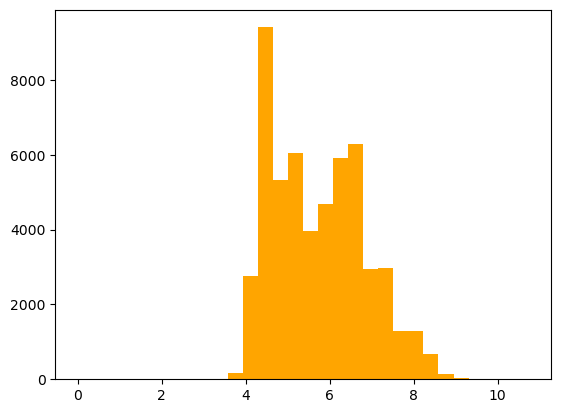

In [438]:
plt.hist(df_processed["x"], color="orange", bins=30)
plt.show()

c:\Users\dpare\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


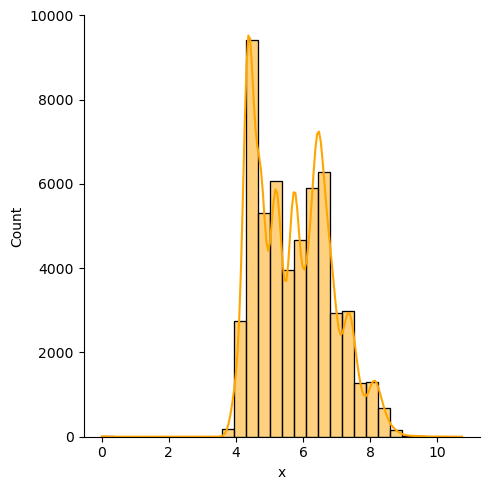

In [439]:
sns.displot(df_processed["x"], kde=True, color="orange", bins=30)
plt.show()

Desviación Estandar y varianza muestral

In [440]:
Desviación = df_processed["x"].std()
Varianza = df_processed["x"].var()
print("La desviacion estandar es de " + str(round(Desviación,2)))
print("La varianza es de " + str(round(Varianza,2)))

La desviacion estandar es de 1.12
La varianza es de 1.26


In [441]:
Media = df_processed["x"].mean()
print("La media es de " + str(round(Media,2)))
Desviación = df_processed["x"].std()
print("La desviacion estandar es de " + str(round(Desviación,2)))
cv = (Desviación/Media)*100
print("El coeficente de variacion es de "+ str(round(cv,2))+"%")


La media es de 5.73
La desviacion estandar es de 1.12
El coeficente de variacion es de 19.57%


#### 4.4. Intervalo de Confianza

In [442]:
df_processed.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,target,x,y,z,estratificado
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Ideal
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Premium
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Good
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Premium
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Good


In [443]:
confidence_level = 0.95
degrees_freedom = len(df_processed["x"]) - 1
mean = np.mean(df_processed["x"])
standard_error = st.sem(df_processed["x"])
confidence_interval = st.t.interval(confidence_level, degrees_freedom, loc=mean, scale=standard_error)
print(confidence_interval)

(5.721690424747487, 5.740623998685957)


c:\Users\dpare\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


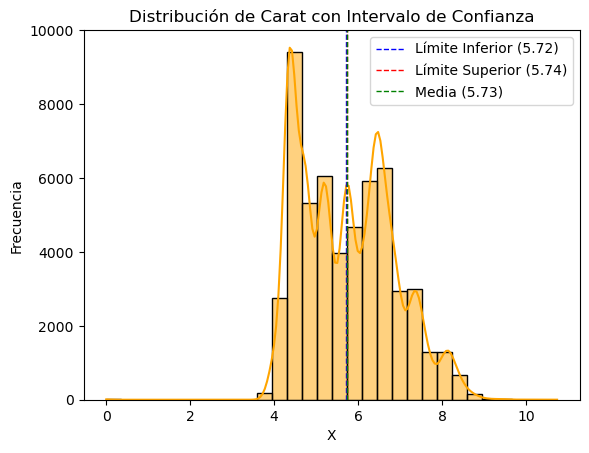

In [444]:
sns.histplot(df_processed["x"], kde=True, color="orange", bins=30)
plt.axvline(confidence_interval[0], color='blue', linestyle='dashed', linewidth=1, label=f'Límite Inferior ({confidence_interval[0]:.2f})')
plt.axvline(confidence_interval[1], color='red', linestyle='dashed', linewidth=1, label=f'Límite Superior ({confidence_interval[1]:.2f})')
plt.axvline(mean, color='green', linestyle='dashed', linewidth=1, label=f'Media ({mean:.2f})')
plt.legend()
plt.title('Distribución de Carat con Intervalo de Confianza')
plt.xlabel('X')
plt.ylabel('Frecuencia')
plt.show()

#### 4.5. Pruebas de Hipotesis

Hipotesis Nula: No hay diferencias significativas entre  x y y

Hipotesis Alternativa: Hay diferencias significativas entre x y y   

### 4.5.1. Prueba de t-studen

In [445]:
df_processed.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,target,x,y,z,estratificado
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Ideal
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Premium
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Good
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Premium
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Good


In [446]:
N = len(df_processed["x"])
print(N)

53940


Error Cuadratico

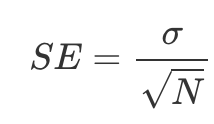

In [447]:
se_x = df_processed["x"].std()/np.sqrt(N)
se_y = df_processed["y"].std()/np.sqrt(N)

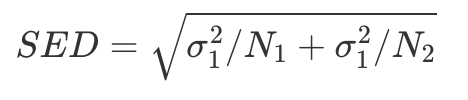

In [448]:
sed = np.sqrt((se_x**2)+(se_y**2))

t-studen

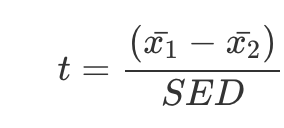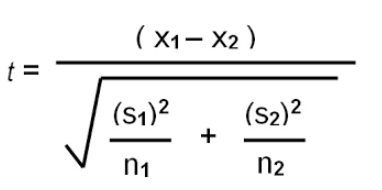

In [449]:
t_stat = (df_processed["x"].mean()-df_processed["y"].mean())/sed
t_stat

-0.4887248340870496

valor p

In [450]:
p = ttest_ind(df_processed["x"],df_processed["y"])
p

TtestResult(statistic=-0.4887248340870353, pvalue=0.6250375129944753, df=107878.0)

In [451]:
_, p_value = ttest_ind(df_processed["x"], df_processed["y"])
p_value

0.6250375129944753

In [452]:
alpha = 0.05
if p_value < alpha:
    print('Se rechaza la hipótesis nula: Hay diferencias significativas entre los grupos.')
else:
    print('Se acepta la hipótesis nula: No hay diferencias significativas entre los grupos.')

Se acepta la hipótesis nula: No hay diferencias significativas entre los grupos.


c:\Users\dpare\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\dpare\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


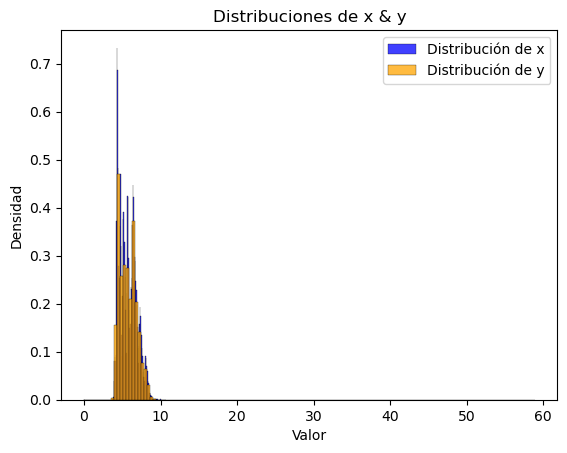

In [453]:
sns.histplot(df_processed['x'], kde=False, color="blue", label='Distribución de x', stat="density", common_norm=False, bins=150)
sns.histplot(df_processed['y'], kde=False, color="orange", label='Distribución de y', stat="density", common_norm=False, bins=150)
plt.legend()
plt.title('Distribuciones de x & y')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.show()

### 4.5.2. Correlación y Coefiente de Pearson

In [454]:
df_processed.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,target,x,y,z,estratificado
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Ideal
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Premium
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Good
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Premium
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Good


In [455]:
df_processed.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'target', 'x', 'y', 'z', 'estratificado'],
      dtype='object')

In [456]:
df_processed.drop("Unnamed: 0", axis=1, inplace=True)
df_processed.head(5)

,carat,cut,color,clarity,depth,table,target,x,y,z,estratificado
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Ideal
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Premium
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Good
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Premium
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Good


In [457]:
df_processed.select_dtypes("number").corr()

,carat,depth,table,target,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
target,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [458]:
df_processed["x"].corr(df_processed["y"])

0.9747014796703499

In [459]:
st.pearsonr(df_processed["x"],df_processed["y"])

PearsonRResult(statistic=0.974701479670351, pvalue=0.0)

In [460]:
f_statistic, p_value = st.pearsonr(df_processed["x"],df_processed["y"])
p_value

0.0

hipotesis nula : No hay una evidencia estadísticamente significativa de que existe una correlación real entre las variables ( x ) e ( y ).

hipotesis alternativa : Hay una evidencia estadísticamente significativa de que existe una correlación real entre las variables ( x ) e ( y ).

In [461]:
alpha = 0.05
if p_value < alpha:
    print('Se rechaza la hipótesis nula')
else:
    print('Se acepta la hipótesis nula')

Se rechaza la hipótesis nula


### 4.5.3. ANOVA

In [462]:
f_statistic, p_value = st.f_oneway(df_processed["x"], df_processed["y"])

In [463]:
print('Estadístico F:', f_statistic)
print('Valor p:', p_value)

Estadístico F: 0.2388519634533395
Valor p: 0.6250375129716264


In [464]:
alpha = 0.05
if p_value < alpha:
    print('Se rechaza la hipótesis nula: Hay diferencias significativas entre los grupos.')
else:
    print('Se acepta la hipótesis nula: No hay diferencias significativas entre los grupos.')

Se acepta la hipótesis nula: No hay diferencias significativas entre los grupos.


### 4.5.4. BOTSTRAPPING

In [465]:
promedio = []
for i in range(40):
    muestra = random.sample(df_processed["x"].tolist(),5)
    prom = np.mean(muestra)
    promedio.append(prom)

In [466]:
mean_poblacion = np.mean(df_processed["x"])
mean_poblacion

5.731157211716722

In [467]:
mean_muestra = np.mean(promedio)
mean_muestra

5.73325

### 4.5.5. VALIDACIÓN CRUZADA

In [468]:
df_processed.head()

,carat,cut,color,clarity,depth,table,target,x,y,z,estratificado
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Ideal
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Premium
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Good
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Premium
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Good


In [469]:
df_processed = df_processed.drop(["estratificado", "x", "y", "z", "clarity", "color"], axis=1)
df_processed.head()

,carat,cut,depth,table,target
0,0.23,Ideal,61.5,55.0,326
1,0.21,Premium,59.8,61.0,326
2,0.23,Good,56.9,65.0,327
3,0.29,Premium,62.4,58.0,334
4,0.31,Good,63.3,58.0,335


In [470]:
df_processed = df_processed.rename(columns={"target":"price"})
df_processed.head()

,carat,cut,depth,table,price
0,0.23,Ideal,61.5,55.0,326
1,0.21,Premium,59.8,61.0,326
2,0.23,Good,56.9,65.0,327
3,0.29,Premium,62.4,58.0,334
4,0.31,Good,63.3,58.0,335


In [471]:
df_processed = df_processed.rename(columns={"cut":"target"})
df_processed.head()

,carat,target,depth,table,price
0,0.23,Ideal,61.5,55.0,326
1,0.21,Premium,59.8,61.0,326
2,0.23,Good,56.9,65.0,327
3,0.29,Premium,62.4,58.0,334
4,0.31,Good,63.3,58.0,335


In [472]:
X = df_processed.drop(columns = ['target'])
y = df_processed['target']

print('Dimensiones de X: {}'.format(X.shape))
print('Dimensiones de y: {}'.format(y.shape))

Dimensiones de X: (53940, 4)
Dimensiones de y: (53940,)


In [473]:
y.value_counts()

target
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [474]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [475]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size = 0.3,
    random_state =4,
)

In [477]:
modelo_tree = DecisionTreeClassifier()
modelo_tree.fit(X_train, y_train)
resultado = modelo_tree.score(X_test, y_test)
print(resultado*100)

63.76838462489186


In [478]:
from sklearn.model_selection import KFold
model = DecisionTreeClassifier()
kfold_validacion = KFold(10)

In [480]:
from sklearn.model_selection import cross_val_score

resultados = cross_val_score(model, X, y, cv=kfold_validacion)
print(resultados*100)
resultados.mean()

[63.32962551 55.78420467 58.21282907 59.91842788 58.17575083 64.23804227
 70.48572488 68.09417872 60.252132   59.621802  ]


0.6181127178346311

In [481]:
print("Puntuaciones de cada fold:", resultados)
print("Puntuación media:", resultados.mean())
print("Desviación estándar:", resultados.std())

Puntuaciones de cada fold: [0.63329626 0.55784205 0.58212829 0.59918428 0.58175751 0.64238042
 0.70485725 0.68094179 0.60252132 0.59621802]
Puntuación media: 0.6181127178346311
Desviación estándar: 0.0442961129684675
